# Space X Analysis
---

This project attempts to delve into the inner workings of Space X, the first private company to have launched liquid propellant rockets and soon after, astronauts into orbit. This analysis focuses on Space X's launch patterns, mission financials, and asks the obscure question, whether there exists any correlation between the successes of Elon's two largest companies, Space X and Tesla. 

### Contents:
1. Introduction
2. Data Import, Clean and Manipulation
3. Analysis of Data
4. Discussion and Conclusion
5. Limitations and Future Prospects
6. References


## 1. Introduction

Space X is a private american aerospace manufacturer with the primary objective of making space travel far more accessible to the human race (SpaceX, 2021). Notably it's accomplishments include being the first private company to launch liquid propellant rockets and astronauts into orbit, as well as successfully reuse orbital rockets. 

Among Space X's long list of accomplishments, arguably it's greatest achievement is it's ability to significantly reduce it's cost of operations through innovations in space travel. On a per seat cost basis, NASA's Apollo and space shuttle programs had costs of $390 million and $170 million respectively. Astoudningly Space X's Dragon capsule seats only cost $55 million (McCarthy, 2021). A major component of these savings are the result of reusing several aspects to each rocket. 

This report will focus on the analysis of Space X's launch patterns, various financials and any correlations with Tesla. The focus on launch patterns will deliver insights into where Space X invests it's resources and how this aligns with their primary mission. A dive into the financials reveals one aspect of their reusability program and how it may impact the performance of the company. Finally Elon is considered an entrepreneur and many people believe in the 'man behind the mission'. This report attempts to explore this unique situtaion where both his companies, Space X and Telsa may have performance correlations due to public sentiment.

### Questions:
- Find the expenditure for launching each payload type as a percentage of total expenditure on payload launches. Identify the payload type with the largest expenditure.
- Identify any existing relationships between payload mass and the orbit type undertaken.
- Display number of payloads launched, their orbit type and the locality of their launchpads. Omit all launchpads with 0 payload launches. Hypothesize why a particular launchpad may more commonly be used.
- Plot the number of launches per year for each locality. Identify the reason for any trends in the launches.
- Create visualisations of the success rate of fairing recoveries and the reusability of recovered fairings. Then find the probability of reusing a fairing from a launch where fairing recovery is attempted. Also find SpaceX's total savings due to fairing reuse.
- Plot the number of ships deployed for each role type. Find the most popular role.
- Investigate how Tesla's stock price varies on Space X's successful launch days. Determine if there is any statistically significant difference compared to Tesla stock's daily average price moves. Replicate this analysis for the volume of Tesla stock traded and discuss any findings.

### Datasets:

The following datasets were obtained from Kaggle (Rao, 2021): 
- capsules.csv
- launches.csv
- launchpads.csv 
- payloads.csv 
- rockets.csv 
- ships.csv

The Tesla stock data was obtained from yahoo finance (Tesla Stock History, 2021): 
- TSLA.csv

## 2. Data Import, Clean and Manipulation

High level cleaning and manipulation is completed in this section to ensure readability of the datasets. However more intricate data cleaning is done on a per question basis. This is to prevent the removal of data that may be relevant for one analysis approach but irrelevant for another. For more detailed cleaning please observe the comments of each individual anaylsis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
import warnings
import seaborn as sns
warnings.filterwarnings("ignore") # Hides one warning for Question 4 related to slicing method.
%matplotlib inline

In [2]:
# Import all relevant csv files
capsules = pd.read_csv('capsules.csv').set_index('capsule_id').rename(columns={'name':'capsule_name','status':'capsule_status'})
launches = pd.read_csv('launches.csv')
launchpads = pd.read_csv('launchpads.csv').set_index('launchpad_id').rename(columns={'name':'launchpad_name'})
payloads = pd.read_csv('payloads.csv').set_index('payload_id').rename(columns={'name':'payload_name','type':'payload_type','mass_kg':'payload_mass_kg','mass_lb':'pay_load_mass_lb'})
rockets = pd.read_csv('rockets.csv').set_index('rocket_id').rename(columns={'name':'rocket_name'})
ships = pd.read_csv('ships.csv').set_index('ship_id').rename(columns={'name':'ship_name','type':'ship_type','active':'ship_active','mass_kg':'ship_mass_kg','mass_lb':'ship_mass_lbs'})
tsla = pd.read_csv('TSLA.csv').set_index('Trade_Date')

A quick inspection of the data frame reveals the launches frame to be linked to all other frames through a primary key for each attribute such as 'rocket_id'. We also note that some attributes like 'ships' and 'capsules' are stored as lists within launches.

In [3]:
launches.head(10)

,launch_id,name,date,rocket_id,launchpad_id,success,failures,ships,capsules,payloads,cores,fairings_reused,fairings_recovery_attempts,fairings_recovered
0,5eb87cd9ffd86e000604b32a,FalconSat,2006-03-24T22:30:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",[],[],['5eb0e4b5b6c3bb0006eeb1e1'],"[{'core': '5e9e289df35918033d3b2623', 'flight'...",False,False,False
1,5eb87cdaffd86e000604b32b,DemoSat,2007-03-21T01:10:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",[],[],['5eb0e4b6b6c3bb0006eeb1e2'],"[{'core': '5e9e289ef35918416a3b2624', 'flight'...",False,False,False
2,5eb87cdbffd86e000604b32c,Trailblazer,2008-08-03T03:34:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",[],[],"['5eb0e4b6b6c3bb0006eeb1e3', '5eb0e4b6b6c3bb00...","[{'core': '5e9e289ef3591814873b2625', 'flight'...",False,False,False
3,5eb87cdbffd86e000604b32d,RatSat,2008-09-28T23:15:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,True,[],[],[],['5eb0e4b7b6c3bb0006eeb1e5'],"[{'core': '5e9e289ef3591855dc3b2626', 'flight'...",False,False,False
4,5eb87cdcffd86e000604b32e,RazakSat,2009-07-13T03:35:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,True,[],[],[],['5eb0e4b7b6c3bb0006eeb1e6'],"[{'core': '5e9e289ef359184f103b2627', 'flight'...",False,False,False
5,5eb87cddffd86e000604b32f,Falcon 9 Test Flight,2010-06-04T18:45:00.000Z,5e9d0d95eda69973a809d1ec,5e9e4501f509094ba4566f84,True,[],[],[],['5eb0e4b7b6c3bb0006eeb1e7'],"[{'core': '5e9e289ef359185f2b3b2628', 'flight'...",NaN,NaN,NaN
6,5eb87cdeffd86e000604b330,COTS 1,2010-12-08T15:43:00.000Z,5e9d0d95eda69973a809d1ec,5e9e4501f509094ba4566f84,True,[],['5ea6ed2d080df4000697c901'],['5e9e2c5bf35918ed873b2664'],"['5eb0e4b9b6c3bb0006eeb1e8', '5eb0e4b9b6c3bb00...","[{'core': '5e9e289ef35918187c3b2629', 'flight'...",None,None,None
7,5eb87cdfffd86e000604b331,COTS 2,2012-05-22T07:44:00.000Z,5e9d0d95eda69973a809d1ec,5e9e4501f509094ba4566f84,True,[],['5ea6ed2d080df4000697c901'],['5e9e2c5bf3591882af3b2665'],['5eb0e4bab6c3bb0006eeb1ea'],"[{'core': '5e9e289ef35918f39c3b262a', 'flight'...",None,None,None
8,5eb87ce0ffd86e000604b332,CRS-1,2012-10-08T00:35:00.000Z,5e9d0d95eda69973a809d1ec,5e9e4501f509094ba4566f84,True,[],['5ea6ed2d080df4000697c902'],['5e9e2c5bf3591835983b2666'],"['5eb0e4bab6c3bb0006eeb1eb', '5eb0e4bab6c3bb00...","[{'core': '5e9e289ff3591821a73b262b', 'flight'...",None,None,None
9,5eb87ce1ffd86e000604b333,CRS-2,2013-03-01T19:10:00.000Z,5e9d0d95eda69973a809d1ec,5e9e4501f509094ba4566f84,True,[],['5ea6ed2d080df4000697c902'],['5e9e2c5bf359189ef23b2667'],['5eb0e4bbb6c3bb0006eeb1ed'],"[{'core': '5e9e289ff3591884e03b262c', 'flight'...",None,None,None


To ensure proper joining of attributes stored as lists in the launches data frame, the explode method was used to unpack each list into it's own row.

In [4]:
# Initialise main working main_df
main_df = launches

# Unpack lists within data frame
main_df['ships'] = main_df['ships'].apply(eval)
main_df = main_df.explode('ships')
main_df['payloads'] = main_df['payloads'].apply(eval)
main_df = main_df.explode('payloads')
main_df['capsules'] = main_df['capsules'].apply(eval)
main_df = main_df.explode('capsules')

To make the data easier to compare across attributes, the launches data frame was selected as the main working frame and all other datasets were joined to it. Each dataframe was individually inspected for relevant columns (as completed on the launches data frame) but in the interest of saving space was chosen to be omitted from this report.

In [5]:
# Join all relevant CSV files
main_df = main_df.join(rockets, on = 'rocket_id') 
main_df = main_df.join(launchpads, on = 'launchpad_id')
main_df = main_df.join(capsules, on = 'capsules')
main_df = main_df.join(ships, on = 'ships')
main_df = main_df.join(payloads, on = 'payloads')
main_df['regime'] = main_df['regime'].astype('category')


## 3. Analysis of Data

### Question 1: 
### Find the expenditure for launching each payload type as a percentage of total expenditure on payload launches. Identify the payload type with the largest expenditure.

                    Expenditure ($ Millions)
payload_type                                
Satellite                             4603.5
Dragon 1.1                             900.0
Crew Dragon                            200.0
Dragon 1.0                             200.0
Dragon 2.0                              50.0
Dragon Boilerplate                      50.0
Lander                                  50.0



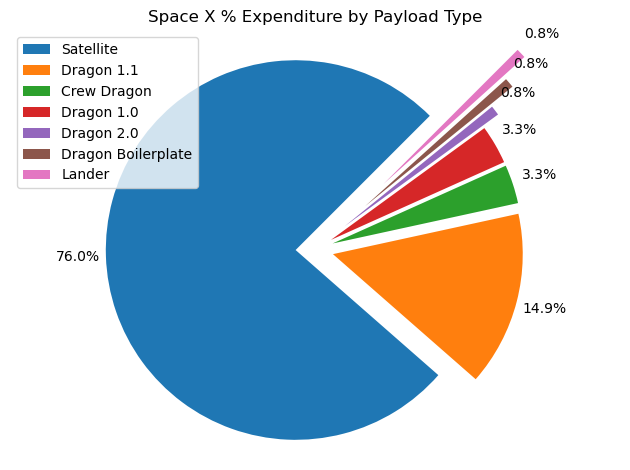

In [6]:
# Create expenditure dataframe and sort values in descending expenditure
# Create count for number of payloads per launch, combine dataframes
expend_payloads = main_df[['payload_type', 'launch_id','payloads']].groupby(['launch_id','payload_type']).count().reset_index()
expend_payloads = launches.merge(expend_payloads, on = 'launch_id')
expend_payloads = expend_payloads.join(rockets, on = 'rocket_id')

# Sum costs for each payload type and sort in descending order
expend_payloads_f = (expend_payloads[['payload_type','cost_per_launch']].groupby('payload_type').sum())/1000000
expend_payloads_f.sort_values(by = 'cost_per_launch', ascending = False, inplace = True)

# Print table of expenditures
print(f"{expend_payloads_f.rename(columns={'cost_per_launch':'Expenditure ($ Millions)'})}\n")

# Initialise pie chart parameters including labels, slices and explode values to create space between
# slices. 
labels = expend_payloads_f.index
slices = expend_payloads_f['cost_per_launch']
explode = (0.1,0.1,0.1,0.1,0.2,0.35,0.5)

# Create pie chart to display expenditures
fig1, ax1 = plt.subplots()
ax1.pie(slices, explode = explode, autopct='%1.1f%%', 
        shadow = False, startangle = 45, pctdistance = 1.15)
plt.title('Space X % Expenditure by Payload Type')
ax1.legend(loc=2,labels=expend_payloads_f.index)

ax1.axis('equal')
plt.tight_layout()
plt.show()


Answer: 

The satellite payload type has the greatest expenditure of $4603.5 million over the course of Space X's life. This accounts for 76% of Space X's total expenditure on payloads. Starlink, a subdividsion of Space X utilises these satellites to provide high speed broadband to locations around the globe. This high frequency of satellite launches accounts for the increased expenditure for this particular payload.


### Question 2:

### Identify any existing relationships between payload mass and the orbit type undertaken.

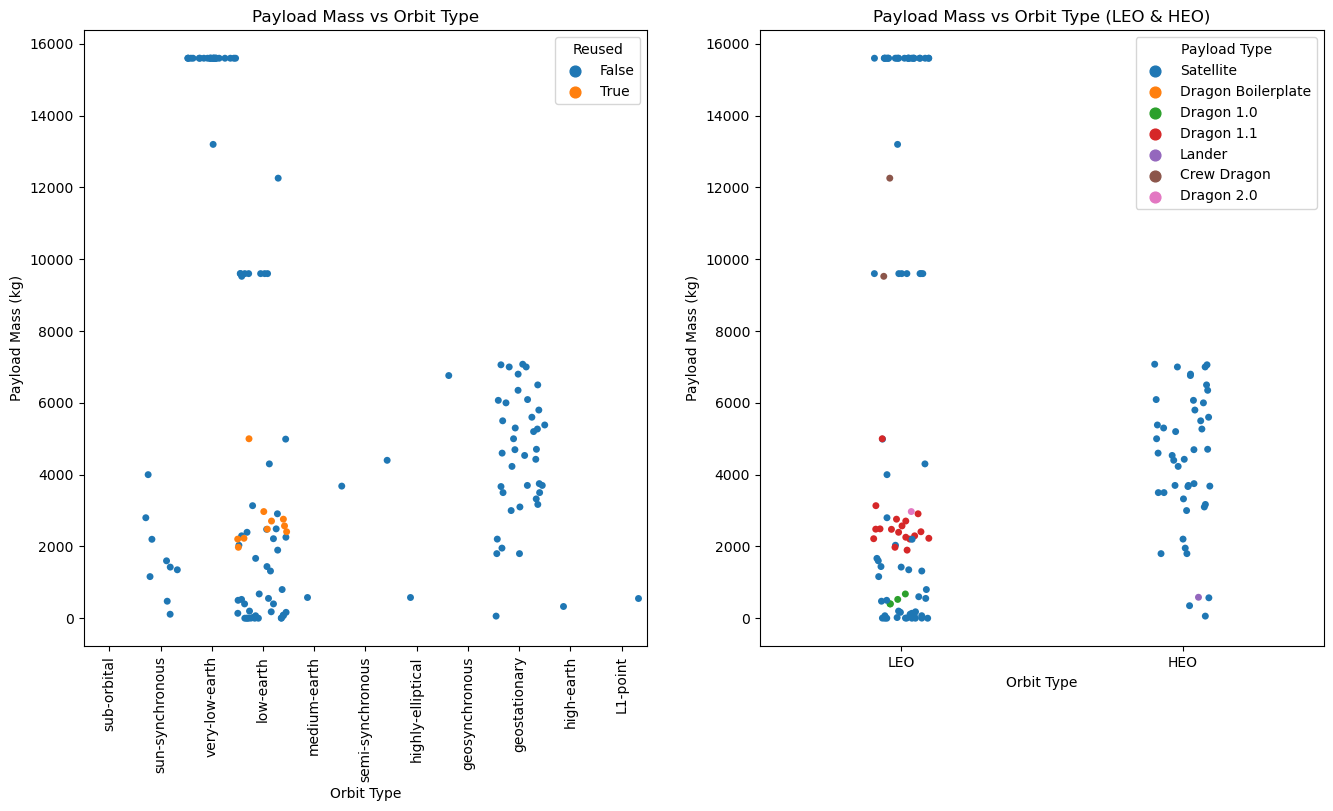

In [7]:
# Initialise graphing parameters: figsize, subplots and order of plot data.
fig = plt.figure(figsize= (16,8))
ax2 = fig.add_subplot(121)
order = ['sub-orbital','sun-synchronous','very-low-earth','low-earth','medium-earth','semi-synchronous','highly-elliptical','geosynchronous','geostationary','high-earth','L1-point']

# Plot seaborn stripplot (can be used to create scatter plot for categorical data).
# Apply jitter so points aren't stacked on top of each other.
sns.stripplot(x = 'regime', y='payload_mass_kg', data = payloads, order = order, hue = 'reused',ax=ax2,jitter= 0.5)
plt.xticks(rotation=90)
plt.xlabel('Orbit Type')
plt.ylabel('Payload Mass (kg)')
plt.title('Payload Mass vs Orbit Type')
ax2.legend(title = 'Reused')

ax3 = fig.add_subplot(122)

# Group orbits into LEO or HEO using replace method.
payloads['binary_orbit'] = payloads['regime'].replace(to_replace =['sub-orbital','sun-synchronous','very-low-earth','low-earth','medium-earth'],value= 'LEO')
payloads['binary_orbit'] = payloads['binary_orbit'].replace(to_replace =['semi-synchronous','highly-elliptical','geosynchronous','geostationary','high-earth','L1-point'],value= 'HEO')

# Follow similar plot logic as above.
sns.stripplot(x = 'binary_orbit', y='payload_mass_kg', data = payloads, order = ['LEO','HEO'],hue = 'payload_type',jitter = 0.1,ax=ax3)
ax3.set_xlabel('Orbit Type')
ax3.set_ylabel('Payload Mass (kg)')
ax3.set_title('Payload Mass vs Orbit Type (LEO & HEO)')
ax3.legend(title = 'Payload Type')
plt.show()

Answer:

The scatter plot on the left depicts payload mass for various orbit types, increasing in altitude from left to right. An interesting observation is that when omitting outliers, payload mass increases with altitude, as prominently seen when observing the low-earth and geostationary orbit types. This is counter intuitive to what would be expected as heavier payloads would be more difficult to launch into higher orbits due to greater fuel consumption. 

The scatter plot on the right groups all orbits below sun-synchronous orbit as a low earth orbit (LEO) and all orbits above and including sun-synchronous as a high earth orbit (HEO). Looking at the distribution of payload types, it is evident that a significant proportion of the LEO payloads are comprised of variations of Dragon capsule launches. This is expected as the Dragon capsule is only utilised to transport astronauts and cargo to the International Space Station, providing no reason for higher earth orbits for these types of payloads. 

The rest of the payload data consists primarily of satellites. It is interesting to note that for LEOs the satellite payload masses are grouped into 100s of kg, 9500kg and 15500kg ranges. One possible deduction from this clumping of data is that Space X consistently utilises 3 variations of satellite types for LEO missions. On the contrary, the satellite masses for higher orbit missions are quite variant. This may indicate missions to higher orbits are generally unique and not repeated often. 

Another observation from the scatter plot on the left is that reused payloads are only launched into LEO. Two assumptions that can be derived are that only LE0 payloads can be reused, or once a payload has been launched previously, it can only be used again for LEO missions. 

### Question 3:
### Display number of payloads launched, their orbit type and the locality of their launchpads. Omit all launchpads with 0 payload launches. Hypothesize why a particular launchpad may more commonly be used.

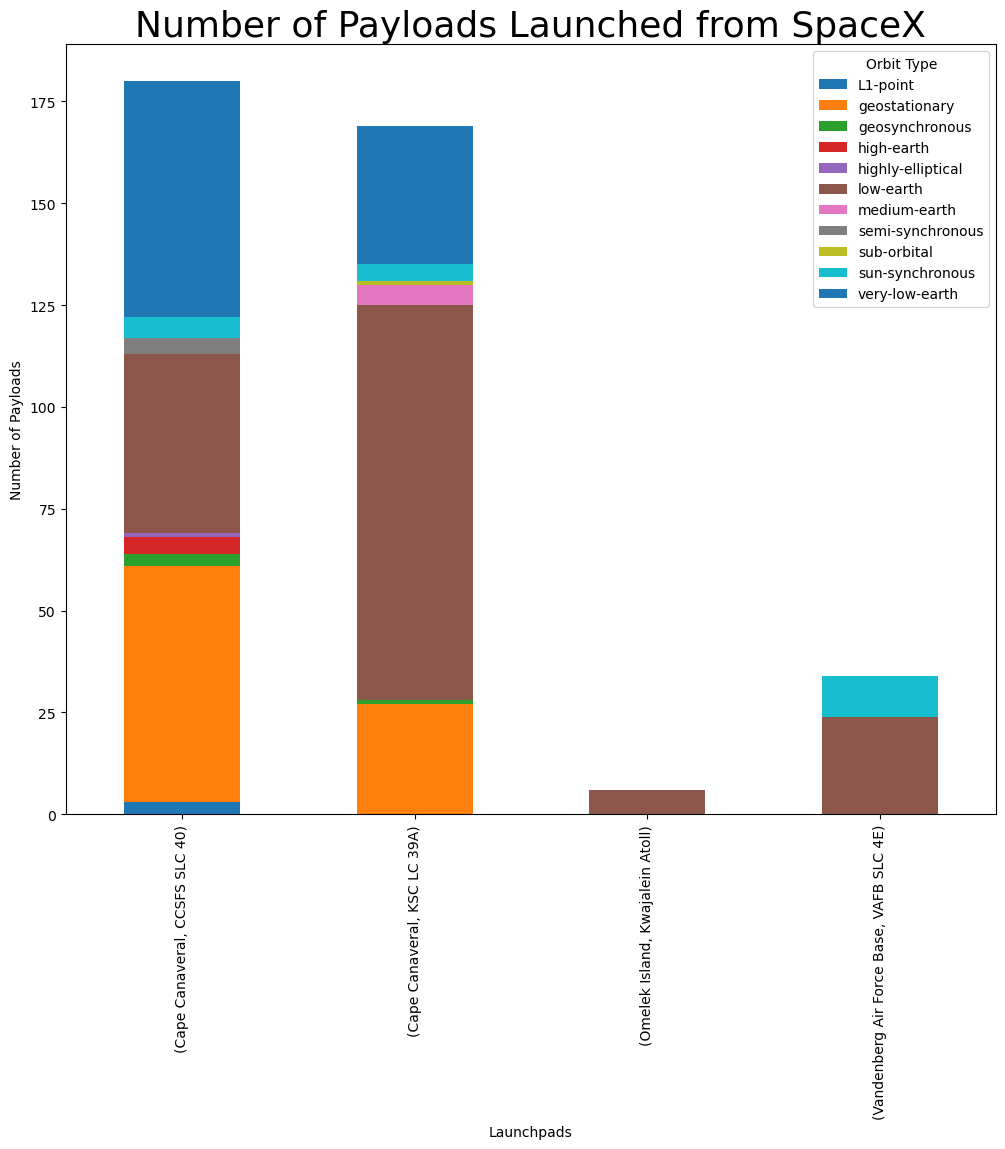

In [8]:
launchpads_orbit = main_df[['launchpad_name','regime','payloads','locality']].groupby(['locality','launchpad_name','regime']).size().unstack()
# Filter out launchpads with 0 payload launches
launchpads_orbit = launchpads_orbit[launchpads_orbit.sum(axis=1) != 0]
# Plot on stacked bar plot
ax4 = launchpads_orbit.plot(
    kind = 'bar',
    stacked = True,
    figsize = (12,10)
    )
plt.xlabel('Launchpads')
plt.ylabel('Number of Payloads')
plt.title('Number of Payloads Launched from SpaceX', size = 26)
plt.legend(title = 'Orbit Type')
plt.show()

Answer:

Undoubtedly, the largest number of payload launches occur from launch complexes 39A and 40 from Cape Canaveral. Traditionally used as NASA's primary launch site, both launch complexes were leased out to Space X. The close proximity to the earth's equator allows for greater kinetic energy of the spacecraft, resulting in a 0.3% reduced energy cost during launch (Lada, 2021). Another observation is that launches from complex 39A appear to support low earth orbits whereas launches from complex 40 support geostationary and higher earth orbits.

Space X also launches from Vandernberg Airforce Base due to the southward flight paths that are allowed to be taken. This allows for easy launching of payloads into sun-synchronous and polar orbits which have higher inclination. This cannot be achieve at Cape Canaveral due to surrounding major population centres (Spaceflight Now, 2021). 

### Question 4: 
### Plot the number of launches per year for each locality. Identify the reason for any trends in the launches. 

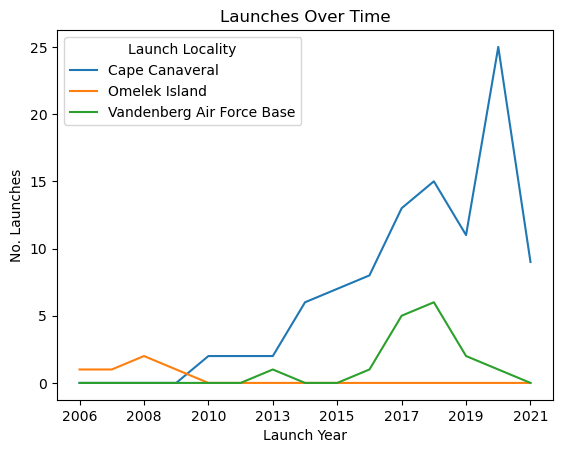

In [9]:
# Convert dates to string and slice first four digits to obtain the year
launches['formatted_dates'] = launches['date'].astype(str).str[0:4]
launches_OT = launches.join(launchpads, on = 'launchpad_id') 
# Group by dates and locality, then unstack to get number of launches each year for each locality
launches_OT = launches_OT.groupby(['formatted_dates','locality'])['launch_id'].count()
launches_OT = launches_OT.unstack()
launches_OT.fillna(0,inplace = True) # Replace NaN values with 0
ax5 = launches_OT.plot()
plt.xlabel('Launch Year')
plt.ylabel('No. Launches')
plt.title('Launches Over Time')
ax5.legend(title = 'Launch Locality')
plt.show()


Answer:

From the visualisation, Cape Canaveral can be seen to account for the most number of launches, derived from the area below the curve. 

It is interesting to note that in 2010, Space X ceased launching from Omelek Island and began launching from Cape Canaveral. The Omelek island launch site was previously utilised by government agencies including NASA as a test launch site. When Space X decided to pursue the Falcon 9 rather than Falcon 1 rockets in 2010, the site was abandonded in favour of Cape Canaveral as it could not support the size of the Falcon 9 without major upgrades (Omelek Island | Wikiwand, 2021). 

Space X can also be seen to begin launching from Vandenberg Air Force Base in 2013. Upon further research, these launches would be dedicated to Falcon 9 rockets carrying starlink satellites. Cape Canaveral is also used for starlink satellite launches, however the locality of Vandenberg Air Force Base allows for a direct launch trajectory when launching satellites into polar orbits. As a direct launch significantly increases payload capacity, as opposed to the launch from Cape Caneveral, Vandenberg was established as a secondary launch location for Space X starlink satellites. 

### Question 5: 
### Create visualisations of the success rate of fairing recoveries and reusability of recovered fairings. Then find the probability of reusing a fairing from a launch where fairing recovery is attempted. Also find SpaceX's total savings due to fairing reuse. 

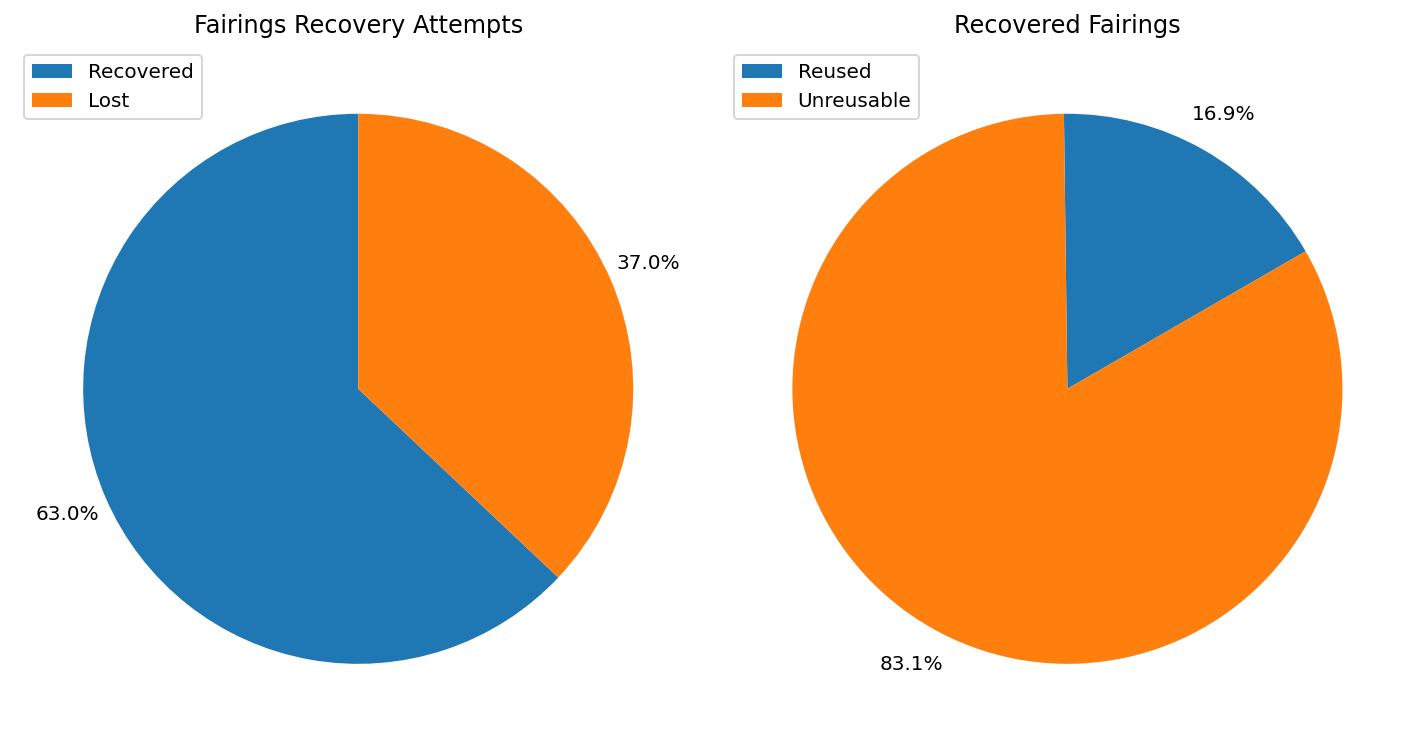

Elon estimates a cost of $6 Million to manufacture each fairing. SpaceX will have theoretically saved $84 Million by reusing fairings over the company's life! (Zafar, 2021)


In [10]:
# Filter launches dataframe for when fairing recovery attempts occurred.
fairing_df = launches[launches['fairings_recovery_attempts'] == 'True']
# Obtain number of fairings recovered and lost.
fairing_counts = fairing_df['fairings_recovered'].value_counts()
# Obtain number of fairings reused and unreusable and store in a dataframe.
fairing_reuse_total = len(launches[launches['fairings_reused'] == 'True'])
fairing_unreusable_total = len(launches[launches['fairings_reused'] == 'False'])
fairing_reuse_count = pd.DataFrame({'Number':[fairing_reuse_total,fairing_unreusable_total]})

# Allocate pie chart parameters and follow similar plot procedure to Question 1.
fairing_labels = ['Recovered','Lost']
fairing_slices = fairing_counts

fig3 = plt.figure(figsize = (10,8),dpi = 144)
ax6 = fig3.add_subplot(121)
ax6.pie(fairing_slices, autopct='%1.1f%%', 
        shadow = False, startangle = 90, pctdistance = 1.15)
plt.title('Fairings Recovery Attempts')
ax6.legend(loc=2,labels=fairing_labels)

fairing_reuse_labels = ['Reused','Unreusable']
fairing_reuse_slices = fairing_reuse_count

ax7 = fig3.add_subplot(122)
ax7.pie(fairing_reuse_slices['Number'], autopct='%1.1f%%', 
        shadow = False, startangle = 30, pctdistance = 1.15)
plt.title('Recovered Fairings')
ax7.legend(loc=2,labels=fairing_reuse_labels)
plt.tight_layout()
plt.show()

fairing_savings = fairing_reuse_total*6

print(f"Elon estimates a cost of $6 Million to manufacture each fairing. SpaceX will have theoretically saved ${fairing_savings} Million by reusing fairings over the company's life! (Zafar, 2021)")


Answer:

Fairings account for 10% of the value of a Falcon 9 rocket, providing great incentive for their recovery (Zafar, 2021). However prior to April 2021, Space X had been attempting to catch the fairings using two ocean recovery ships (Techcrunch, 2021). This was to prevent excessive refurbishment due to salt water corrosion. 

The probability of a fairing being reusable from a recovery attempt is given by:

P(Success) = P(Reusable) x P(Successful Recovery)

           = 0.63 * 0.169

           = 0.11

Accounting for a current refurbishment cost of $1.5 million with the recovery cost being negiligble in comparison, the expected return of each recovery attempt can be calculated by:

E(X) = (6 - 1.5) x 0.11 + 0.89 x 0 

       = $0.495 million.

Although still profitable, the return on investment is still significantly lower than the original value of the fairing.

As a result Space X has now decided to allow for fairings to be recovered after impact with the ocean (Universe Today, 2021). Elon claims this will drastically improve the probability of recovery, thus theoretically increasing the expected return. 

### Question 6: 
### Plot the number of ships deployed for each role type. Find the most popular role. 

In [11]:
ships.head(10) # Take a quick glance at original ship data, reason
               # will become apparent in answer to question.

,ship_name,ship_type,ship_active,model,roles,imo,mmsi,abs,class,ship_mass_kg,ship_mass_lbs,year_built,home_port
ship_id,,,,,,,,,,,,,
5ea6ed2d080df4000697c901,American Champion,Tug,False,NaN,"['Support Ship', 'Barge Tug']",7434016.0,367020820.0,571252.0,7604342.0,266712.0,588000.0,1976.0,Port of Los Angeles
5ea6ed2d080df4000697c902,American Islander,Cargo,False,NaN,['Dragon Recovery'],NaN,367035570.0,NaN,NaN,NaN,NaN,NaN,Port of Los Angeles
5ea6ed2d080df4000697c903,American Spirit,Cargo,False,NaN,['Support Ship'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Port of Los Angeles
5ea6ed2d080df4000697c904,A Shortfall of Gravitas,Barge,False,NaN,['ASDS barge'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Port Canaveral
5ea6ed2e080df4000697c905,Betty R Gambarella,Tug,False,NaN,['ASDS Tug'],7517478.0,368000890.0,562590.0,7427463.0,202302.0,446000.0,1974.0,Port of Los Angeles
5ea6ed2e080df4000697c906,Elsbeth III,Tug,False,NaN,['ASDS Tug'],8983375.0,367017460.0,NaN,NaN,273063.0,602000.0,1999.0,Port Canaveral
5ea6ed2e080df4000697c907,GO Ms Chief,High Speed Craft,True,NaN,['Fairing Recovery'],9744453.0,338035000.0,1247527.0,14245747.0,449964.0,992000.0,2014.0,Port Canaveral
5ea6ed2e080df4000697c908,GO Ms Tree,High Speed Craft,True,NaN,['Fairing Recovery'],9744465.0,368059550.0,1249191.0,15252765.0,449964.0,992000.0,2015.0,Port Canaveral
5ea6ed2e080df4000697c909,GO Navigator,Cargo,True,NaN,"['Support Ship', 'Fairing Recovery']",9566887.0,367550000.0,1221524.0,9204358.0,451778.0,996000.0,2009.0,Port Canaveral


              index  roles
0      Support Ship    148
1  Fairing Recovery    124
2        ASDS barge     79
3          ASDS Tug     65
4   Dragon Recovery     21
5         Barge Tug     16


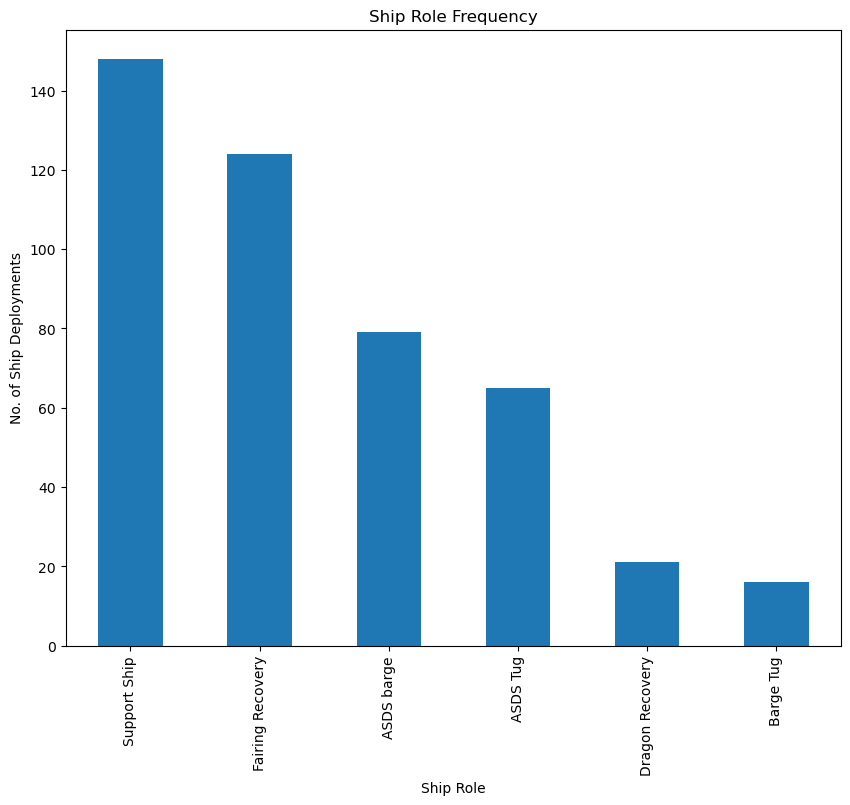

In [12]:
# Filter out rows with null values for 'roles'
ship_roles_df = main_df[main_df['roles'].notnull()]
# Apply explode on roles column to convert list elements into individual rows in dataframe
ship_roles_df['roles'] = ship_roles_df['roles'].apply(eval)
ship_roles_df = ship_roles_df.explode('roles')
ship_roles_df = ship_roles_df['roles'].value_counts()
ship_roles_df = ship_roles_df.to_frame()
ship_roles_df.reset_index(inplace = True)
print(ship_roles_df)

# Plot ship role counts
ax8 = ship_roles_df.plot(
    kind = 'bar',
    figsize = (10,8),
    x = 'index',
    y = 'roles'
    )
plt.xlabel('Ship Role')
plt.ylabel('No. of Ship Deployments')
plt.title('Ship Role Frequency')
ax8.get_legend().remove()
plt.show()

Answer:

Here it is important to note that ocean ships that Space X use can be classified to fulfill multiple roles simultaneously. The most popular ship role is the support ship with 148 deployments. The second most frequent is the fairing recovery with 124 deployments. Taking a look at the original ships data frame, it can be seen that three of the ships take on both a support and fairing recovery role. Similarly the support role can be paired with other roles. This explains why the support type is the most popular among the roles as it is usually paired with one of the other roles. Fairing recovery being the second most popular reveals that Space X makes a significant investment in recovering fairings after launches. This is largely inflated compared to other recovery attempts because fairings can be recovered from almost every launch, whereas payloads such as Dragon capsules are launch specific and are not as common. 

### Question 7: 
### Elon is well renowned for two of his most successful companies, Space X and Tesla. It is commonly theorised that many investors treat Elon and his companies as a package rather than individual investments.

### To identify if there is any truth to this statement, investigate how Tesla's stock price varies on Space X's successful launch days. Determine if there is any statistically singificant difference compared to Tesla stock's daily average price moves. Replicate this analysis for the volume of Tesla stock traded and discuss any findings. 

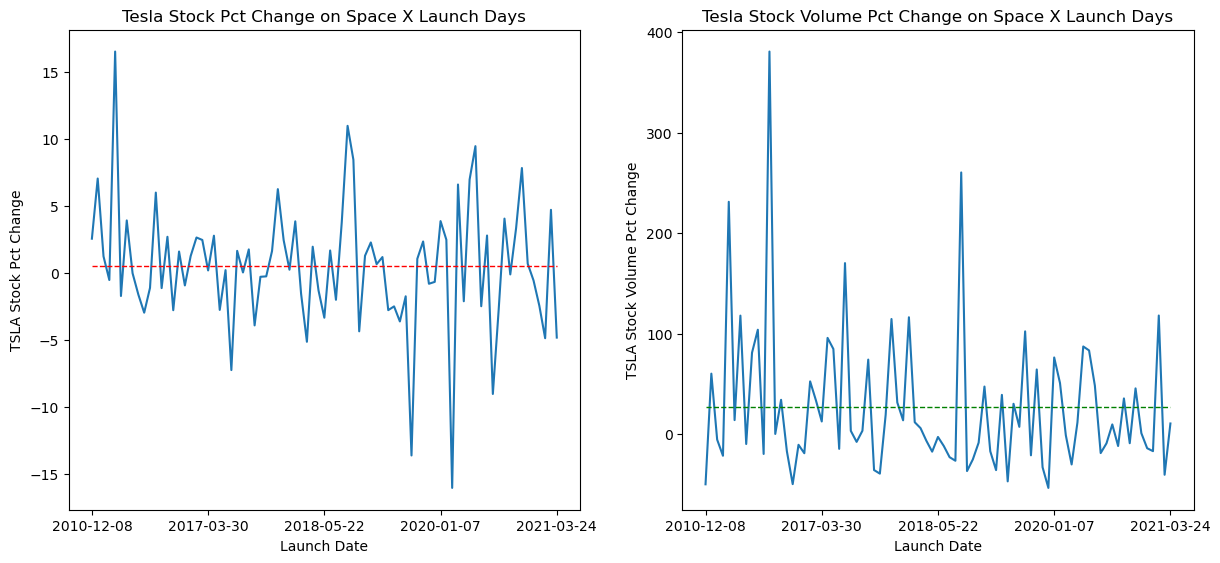


Date of largest momentum change: 
trade_dates            2015-04-27
Pct Change               6.006501
Pct Momentum Change    380.789192
Name: 22, dtype: object

Date of largest price change: 
trade_dates            2013-12-03
Pct Change              16.533788
Pct Momentum Change    231.334503
Name: 11, dtype: object



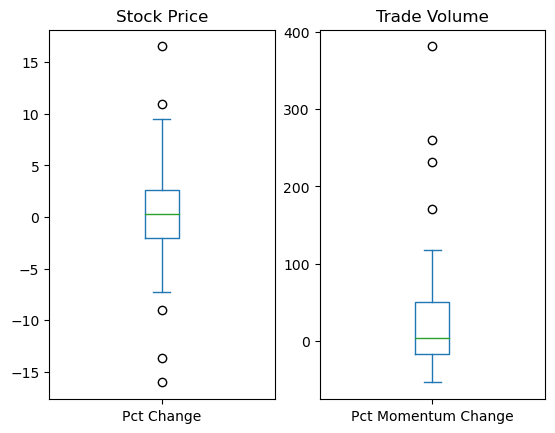

In [13]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize = (6,6))

# Add pct change columns for both share price and volume traded
tsla['Pct Change'] = tsla['Adj Close'].pct_change()*100
tsla['Pct Momentum Change'] = tsla['Volume'].pct_change()*100
# Convert launch dates to strings and slice first 10 digits to get date without timestamp
launches['trade_dates'] = launches['date'].astype(str).str[0:10]
# Join on launches dataframe to get share prices on launch dates and then filter down to successful launches
tsla_corr = launches.join(tsla[['Pct Change','Pct Momentum Change']], on = 'trade_dates', how = 'left' )
tsla_corr = tsla_corr[tsla_corr['success']==True]
tsla_corr = tsla_corr[['trade_dates','Pct Change','Pct Momentum Change']]
tsla_corr.dropna(inplace=True) # First recorded trade dates will have no pct change, therefore drop rows.

# Plot tesla share price pct vs launch date.
ax9 = tsla_corr.plot(x = 'trade_dates',y = 'Pct Change',ax=axes[0])
plt.locator_params(axis='x', nbins=10)
avg = [tsla_corr['Pct Change'].mean()] * len(tsla_corr) 
ax9.plot(avg,color='red', lw=1, ls='--') # Overlay average value of results.
ax9.set_xlabel('Launch Date')
ax9.set_ylabel('TSLA Stock Pct Change')
ax9.set_title('Tesla Stock Pct Change on Space X Launch Days')
ax9.get_legend().remove()
standard_movement = tsla['Pct Change'].mean() # Average for all trading days not just launch days.
tset, pval1 = ttest_1samp(tsla_corr['Pct Change'], standard_movement) # Complete p-test.

# As above for pct momentum change.
ax10 = tsla_corr.plot(x = 'trade_dates',y = 'Pct Momentum Change',ax=axes[1])
plt.locator_params(axis='x', nbins=10)
m_avg = [tsla_corr['Pct Momentum Change'].mean()] * len(tsla_corr)
ax10.plot(m_avg,color='green', lw=1, ls='--')
ax10.set_xlabel('Launch Date')
ax10.set_ylabel('TSLA Stock Volume Pct Change')
ax10.set_title('Tesla Stock Volume Pct Change on Space X Launch Days')
ax10.get_legend().remove()
m_standard_movement = tsla['Pct Momentum Change'].mean()
tset, pval2 = ttest_1samp(tsla_corr['Pct Momentum Change'], m_standard_movement)
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
plt.show()

print(f"\nDate of largest momentum change: \n{tsla_corr.loc[tsla_corr['Pct Momentum Change'].idxmax()]}")
print(f"\nDate of largest price change: \n{tsla_corr.loc[tsla_corr['Pct Change'].idxmax()]}\n")

# Plot box plot to visualise spread.
ax11 = tsla_corr.plot(kind='box', subplots = True, title = ['Stock Price','Trade Volume'])
plt.show()

Answer:

The plots for Tesla stock price percentage change and volume traded percentage change are shown above. The average of each set of values is also plotted using the red and green dotted lines for each graph respectively. Upon inspection of both plots, there is no clear trend indicating an increase or decrease in percentage change for volume or stock prices with cumulative successful launches. However we can determine that the average change is greater than 0. To derive meaning from this we must compare it with the average change observed for Tesla's stock price and volume throughout all trading days. 

Further investigation reveals Tesla's largest percentage volume change to have occurred on the 27/04/2015. A quick google search of Space X news for this date reveals the second successful launch of a Falcon 9 rocket within the week, along with Turkmenistan's first satellites being launched by the company. To ensure positive Tesla news may not have influenced this move, a google search for Tesla was also completed. The results indicated no significant events on the specific date, however records show analyst upgrades to the stock price in the weeks prior. Similarly, greatest percentage price change is observed on 03/12/2013. On investigating this date, it is revealed that Space X launched it's first satellite into geostationary orbit. There was no Tesla news on this day. Again this could indicate an underlying positive correlation between the two companies, however conclusions cannot be drawn until statistical analysis is done. 

Observing the boxplot, we can further visulaise the spread of the data. Greater spread indicates high variation in the data as observed within the momentum change boxplot. Due to this increase in variation there is great risk in using this analysis to forecast the percentage volume change after a Space X launch. However the spread of the momentum change is seen to be greatly skewed towards positive values, so it may be appropriate to infer that a successful launch will result in more volume traded of Tesla stock. The stock price percentage change boxplot has a tighter spread resulting in far less variation. However as this spread is centred around 0 it is difficult to make predicitions about the direction of a move in the stock price. 

Statistical testing and the results are shown below:

In [14]:

# Print results.
print(f"""On average, when Space X has a successful launch, Tesla's stock price has a percentage increase 
of {round(avg[0],2)}% compared to its previous close. Although this is not a large increase, Tesla's standard 
daily percentage change is only {round(standard_movement,2)}%. Thus Telsa moves twice as much on a successful Space X 
launch day when compared to it's daily average moves. 

Using a one tailed T-test we identify the p-value is {round(pval1,3)}. Selecting a rejection region of 0.05,
we do not reject the null hypothesis. Thus this observation is not statistically significant.\n""")

print(f"""Similarly, on a successful launch, Tesla's volume traded has an average percentage 
increase of {round(m_avg[0],2)}% compared to its previous close. Tesla's average daily volume percentage change 
is {round(m_standard_movement,2)}%. Thus Telsa is traded {round(m_avg[0],2)-round(m_standard_movement,2)}% more on a successful Space X launch day when compared 
to it's daily average. 

Again, using a one tailed T-test we identify the p-value is {round(pval2,3)}. Although much lower than the 
price daily change, due to our rejection region of 0.05, we still do not reject the null hypothesis. 
Thus this observation is also not statistically significant.\n""")

On average, when Space X has a successful launch, Tesla's stock price has a percentage increase 
of 0.52% compared to its previous close. Although this is not a large increase, Tesla's standard 
daily percentage change is only 0.24%. Thus Telsa moves twice as much on a successful Space X 
launch day when compared to it's daily average moves. 

Using a one tailed T-test we identify the p-value is 0.598. Selecting a rejection region of 0.05,
we do not reject the null hypothesis. Thus this observation is not statistically significant.

Similarly, on a successful launch, Tesla's volume traded has an average percentage 
increase of 27.11% compared to its previous close. Tesla's average daily volume percentage change 
is 11.44%. Thus Telsa is traded 15.67% more on a successful Space X launch day when compared 
to it's daily average. 

Again, using a one tailed T-test we identify the p-value is 0.054. Although much lower than the 
price daily change, due to our rejection region of 0.05, we st

Conducting statistical tests on the average value for stock price and volume percentage change, we identify that neither has statistical significance when compared to averages across all trading. As a result we cannot prove an underlying relationship between Space X and Tesla, suggesting investors do not treat the two companies as interrelated. 

## 4. Discussion and Conclusion

Analysis of this set of Space X datasets has allowed for the discovery of several interesting revelations. Exploration of launch statistics reveals that Space X primarily focuses on satellite launches compared against other payload types. Expenditure wise, satellites also consume most of Space X's payload launch costs. This is somewhat justified as Starlink, the subsidiary of Space X would be a large revenue generator as a result of their mission to provide high speed, world wide broadband. This business endeavour is highly scalable compared to Space X's more unique business models such as securing NASA contracts and sending astronauts to Mars. Therefore from the data, it can be assumed that although satellites exist as a large cost centre for launches, their frequency may indicate other economic benefits for Space X which may allow the company to fund it's alternate endeavours. 

The mass distribution for payloads also reveals that Space X tends to launch 3 variations (mass wise) of satellites consistently to low earth orbit. Whereas each satellite launched into geostationary orbits vary in mass. This suggests that Space X currently only produces repeatable missions for low earth orbits. Interestingly the reusability of the payload is seen to be also restricted to low earth orbits. Analysis of the launch localities correlates with Space X's transition from test launches at Omelek Island to it securing leases for Cape Canaveral from NASA. It is interesting to note that Space X still maintains a lease for Vandenberg Air Force base as it provides a direct launch path for satellites going into polar and sun-synchronous orbits. The general trend of launches for Space X is seen to increase in all years except 2019 and 2021. As it is still mid 2021 at the time of writing, we can discount 2021 in the data as the year is incomplete. 2019 however saw a 40% decline in launches. Investigation of this reveals that Space X customers were not ready for launch at this point in time as opposed to Space X being behind schedule (Foust, 2021). 

Delving into the reusability of Space X rockets, fairings were identified as one of the initial areas of the craft that were attempted to be reused. Although analysis only reveals a reusability probability of 0.11 when a fairing recovery is attempted, the expected return is still $0.495 million which is no insignificant amount. Observation of Space X's ocean ship fleet also indicate a heavy invesment in fairing recovery with the majority of ships possessing the role of fairing recovery. Thus it can be assumed that the fairing recovery process must provide significant financial impact to Space X. 

The atypical question of whether investors assume correlated success between two of Elon's largest companies, Space X and Tesla was also explored. Although successful launch days resulted in twice the average daily share price move in the positive direction for Tesla, the result was not statistically significant. Similarly the momentum change of Tesla also increased signficantly on a successful launch day. The p-value for this test was 0.054 which is far more significant than the price moves, but does not constitute statistical significance given our rejection region of 0.05. Therefore with confidence we can conclude that the two companies successes are not correlated according to the market. 

The analysis presented within this report provides a window into the inner workings of Space X's launch strategies and a glimpse of it's innovative cost reduction methods. However, the comparison with Tesla's share price performance shows no statistically significant correlation with Space X's success. 




## 5. Limitations and Future Work

The largest limitation to the analysis conducted in this report is that due to Space X being a private company, it is extremely difficult to obtain strong financial information about the company aside from rare twitter posts from Elon himself. A deeper dive into the financials could be completed if this data was readily available, and key metrics including total yearly savings due to reusablity projects could be determined. Furthermore a strong comparative study could be completed between Space X and Tesla if both companies were traded publicly. This may provide more insight to their correlated success. Another strong limiting factor were the sparse data points available for analysis. As space X has only had a little over 100 launches since it's establishment, the data set can not be considered large enough to draw strong conclusions. To overcome this, trends identified within this data set can be compared to launches from other companies with larger datasets such as NASA. If trends appear across both analyses then stronger conclusions can be drawn. 

## 6. References

Foust, J., 2021. SpaceX’s 2020 ambitions tempered by 2019 outcomes - SpaceNews. [online] SpaceNews. Available at: <https://spacenews.com/spacexs-2020-ambitions-tempered-by-2019-outcomes/> [Accessed 15 August 2021].

Finance.yahoo.com. 2021. Tesla Stock History. [online] Available at: <https://finance.yahoo.com/quote/TSLA/history/> [Accessed 14 August 2021].

Rao, R., 2021. r/SpaceX Data (2006 - 2021). [online] Kaggle.com. Available at: <https://www.kaggle.com/rohanrao/rspacex-data> [Accessed 14 August 2021].

En.wikipedia.org. 2021. SpaceX - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/SpaceX> [Accessed 14 August 2021].

McCarthy, N., 2021. Why SpaceX Is A Game Changer For NASA [Infographic]. [online] Forbes. Available at: <https://www.forbes.com/sites/niallmccarthy/2020/06/04/why-spacex-is-a-game-changer-for-nasa-infographic/?sh=7caaabb16565> [Accessed 14 August 2021].

Spaceflightnow.com. 2021. SpaceX to ramp up Vandenberg launch cadence with Starlink missions – Spaceflight Now. [online] Available at: <https://spaceflightnow.com/2021/04/06/spacex-to-ramp-up-vandenberg-launch-cadence-with-starlink-missions/> [Accessed 9 August 2021].

Techcrunch.com. 2021. SpaceX successfully catches both halves of fairings for the first time. [online] Available at: <https://techcrunch.com/2020/07/20/spacex-successfully-catches-both-fairing-halves-for-the-first-time-on-its-latest-launch/> [Accessed 9 August 2021].

SpaceX. 2021. SpaceX. [online] Available at: <https://www.spacex.com/mission/> [Accessed 16 August 2021].

Lada, B., 2021. Why does NASA launch rockets from Cape Canaveral, Florida?. [online] accuweather. Available at: <https://www.accuweather.com/en/weather-news/why-does-nasa-launch-rockets-from-cape-canaveral-florida/352412> [Accessed 16 August 2021].

Universe Today. 2021. SpaceX has Given up Trying to Catch Rocket Fairings. Fishing Them out of the Ocean is Fine - Universe Today. [online] Available at: <https://www.universetoday.com/150924/spacex-has-given-up-trying-to-catch-rocket-fairings-fishing-them-out-of-the-ocean-is-fine/> [Accessed 9 August 2021].

Wikiwand. 2021. Omelek Island | Wikiwand. [online] Available at: <https://www.wikiwand.com/en/Omelek_Island> [Accessed 9 August 2021].

Zafar, R., 2021. SpaceX Saves At Least $30 Million In 2020 By Ramping Up Reusability. [online] Wccftech. Available at: <https://wccftech.com/spacex-saves-fairing-reuse-2020/> [Accessed 9 August 2021].